# AirBnB Fair Valuation

Bem-vindo ao Airbnb Analysis Corp.! Sua tarefa é definir a **taxa diária de acomodação competitiva** para a casa de um cliente em Bondi Beach. Atualmente, o proprietário cobra US $ 500. Fomos incumbidos de estimar um **valor justo** que o proprietário deveria cobrar. A casa tem as seguintes características e restrições. Ao desenvolver esse modelo, você percebeu que o Airbnb pode usá-lo para estimar o valor justo de qualquer propriedade em seu banco de dados, você está efetivamente criando um modelo de recomendação para todos os possíveis hosts!


1. O proprietário é anfitrião desde **agosto de 2010**
1. O local é **lon: 151.274506, lat: 33.889087**
1. A classificação atual da pontuação da revisão **95,0**
1. Número de avaliações **53**
1. Noites mínimas **4**
1. A casa pode acomodar **10** pessoas.
1. O proprietário atualmente cobra uma taxa de limpeza de **370**
1. A casa tem **3 banheiros, 5 quartos, 7 camas**.
1. A casa está disponível por **255 dos próximos 365dias**
1. O cliente é **verificado** e é um superhost **.
1. A política de cancelamento é **rigorosa com um período de carência de 14 dias**.
1. O host exige um depósito de segurança de **$ 1.500**


* Todos os valores se aplicam estritamente ao mês de julho de 2018 *

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
import pandas as pd

Aqui estamos criando nossa amostra de usuário.

In [2]:
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

Importando dataset

In [3]:
from pathlib import Path

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Be patient: loading from github (2 minutes)
Done


C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


Removendo colunas não desejadas no dataset

In [5]:
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

df = df[incl]
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [6]:
df.shape

(27070, 20)

Agora iremos criar uma função regular para remover o caracter "$" das células que apresentam valores financeiros.

In [7]:
# Importing regex
import re

# The price fields in our data frame
price_list = ["price","cleaning_fee","security_deposit"]

# We change any blanks to 0 and use our regex function to remove anything that isn't a number (or negative number which is changed to 0)
for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

df['host_since'] = pd.to_datetime(df['host_since'])

In [8]:
df["price"].head()

0     65.0
1     98.0
2    469.0
3     63.0
4     39.0
Name: price, dtype: float64

Analisando algumas informações

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
price                     27070 non-null float64
city                      27037 non-null object
longitude                 27070 non-null float64
latitude                  27070 non-null float64
review_scores_rating      19512 non-null float64
number_of_reviews         27070 non-null int64
minimum_nights            27070 non-null int64
security_deposit          27070 non-null float64
cleaning_fee              27070 non-null float64
accommodates              27070 non-null int64
bathrooms                 27048 non-null float64
bedrooms                  27062 non-null float64
beds                      27037 non-null float64
property_type             27070 non-null object
room_type                 27070 non-null object
availability_365          27070 non-null int64
host_identity_verified    27035 non-null object
host_is_superhost         27035 non-null object
host_since            

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y=df.price)
plt.show()

<Figure size 640x480 with 1 Axes>

- Podemos ver alguns preços bem altos, com a maioria se localizando no fundo do gráfico (aparentemente ~ 100-200)

- Agora usamos o skew para verificar a simetria da distribuição dos dados (0 sendo perfeitamente simétrico)

In [11]:
df.price.skew()

13.808558337216192

Também podemos usar a curtose para analisar nossos dados.
- “Kurtosis é o grau de pico de uma distribuição” - Wolfram MathWorld

In [12]:
df.price.kurtosis()

413.4301463784445

Portanto, para remover ou filtrar nossos "valores extremos" de alto valor, considere tirar nossos dados do percentil 99,5% e excluir os 0,25% inferiores e os 0,25% superiores dos preços.<br>
 Essa função retorna o valor mais alto do percentil 99,5%, que ainda é relativamente alto quando comparado à média e mediana

In [13]:
print(df["price"].quantile(0.995))
print(df["price"].mean())
print(df["price"].median())

1600.0
209.27879571481344
135.0


Agora iremos remover os outliers da coluna "price".

In [14]:
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)
df["price"].skew()

2.957872457159033

Calculando o valor de Skew novamente foi possível notar que a distribuião dos preços se tornou mais simétrica.
***
Na próxima célula vamos verificar os valores nulos no dataset;

In [15]:
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

Nesta parte contaremos quantos valores únicos temos em cata coluna.

In [17]:
print(df["cancellation_policy"].value_counts(),"\n")
print(df["city"].value_counts(),"\n")
print(df["property_type"].value_counts(),"\n")
print(df["room_type"].value_counts(),"\n")

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64 

Bondi Beach                          1671
Manly                                 958
Surry Hills                           919
Bondi                                 785
Randwick                              684
Sydney                                682
Coogee                                675
Darlinghurst                          660
North Bondi                           629
Newtown                               490
Redfern                               479
Maroubra                              443
Paddington                            443
Bondi Junction                        416
Mosman                                385
Potts Point                           380
Bronte                                367
Pyrmont                               307
Waterloo         

In [18]:
df["city"].value_counts().sum()

26899

In [19]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


Vamos explorar um pouco os dados por visualizações.

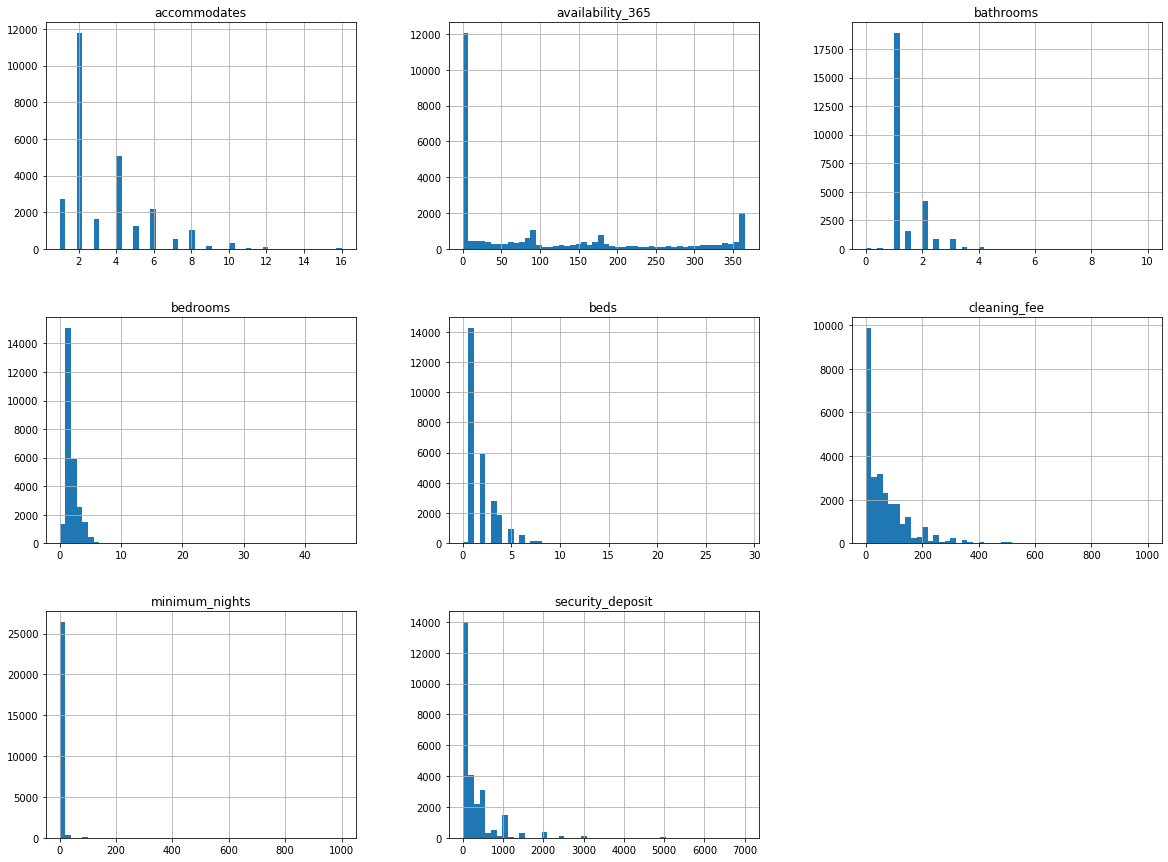

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

try:
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    
    plt.show()
except AttributeError:
    pass

Plotando um gráfico de frequência das cidades.

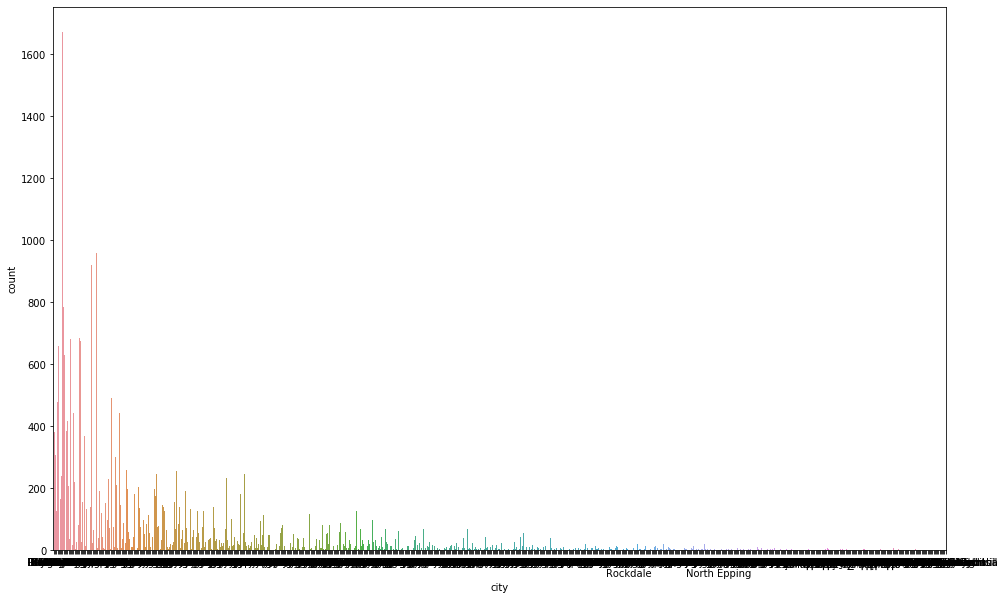

In [21]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x="city", data=df)

Agora vamos fazer uma lista das 20 cidades com mais hospedagens, e em seguida iremos retirar as outras do dataset.

In [30]:
list_of_20 = list(df["city"].value_counts().head(20).index)
df = df[df["city"].isin(list_of_20)].reset_index(drop=True)

- Agora, removemos as ocorrências raras nas categorias, pois é necessário para a etapa de validação cruzada
- Atapa abaixo é um pouco semelhante ao que foi feito com as cidades acima<br><br>
Armazenamos as contagens de cada tipo na variável item_counts

In [31]:
item_counts = df.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df = df[~df["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
df["property_type"].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Name: property_type, dtype: int64

Chegou a hora de separar nosso dataset

In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Agora transforvamos dados categóricos em numéricos.

In [33]:
df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [55]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ["city"]:
    df[col+"_code"] = le.fit_transform(df[col])

In [35]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,...,1.0,1.0,Apartment,Private room,285,0,0,2009-03-12,strict_14_with_grace_period,3
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,...,5.0,7.0,House,Entire home/apt,255,0,0,2010-08-14,strict_14_with_grace_period,1
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,...,2.0,3.0,Apartment,Entire home/apt,233,0,0,2010-04-26,strict_14_with_grace_period,0
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,...,2.0,2.0,Apartment,Entire home/apt,152,0,0,2010-04-26,strict_14_with_grace_period,6
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,...,1.0,1.0,Apartment,Entire home/apt,94,0,0,2012-01-18,strict_14_with_grace_period,1


### Validador cruzado de divisão aleatória estratificada

Fornece índices de treinamento / teste para dividir dados em conjuntos de treinamento / teste.

Esse objeto de validação cruzada é uma mesclagem de StratifiedKFold e ShuffleSplit, que retorna pastas aleatórias estratificadas. As pastas são feitas preservando a porcentagem de amostras para cada classe.

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

## we will stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["city_code"]):
    del df["city_code"]
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Verificando média de preços em cidades diferentes em uma amostra da população total deste dataset

In [66]:
strat_test_set.groupby("city")["price"].mean()

city
Bondi           198.745223
Bondi Beach     199.879880
Coogee          196.574627
Darlinghurst    184.700000
Manly           223.447368
Newtown         117.938776
North Bondi     248.857143
Randwick        178.072993
Surry Hills     175.732240
Sydney          193.962687
Name: price, dtype: float64

Agora iremos plotar um gráfico de dispersão das coordenadas de cada item presente no nosso dataset

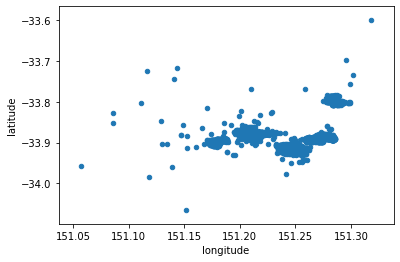

In [67]:
traval = strat_train_set.copy()
traval.plot(kind="scatter", x="longitude", y="latitude")

Adcicionando o parâmetro alpha na plotagem, podemos perceber que haverá uma descriminação de itens relacionados com sua densidade 

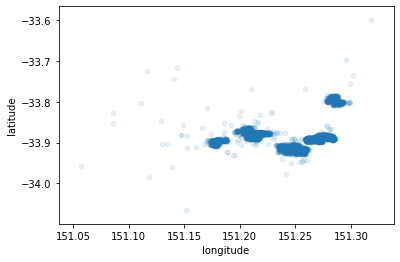

In [68]:
traval.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Agora iremos criar uma janela para seleconar a área onde está a maioria das ocorrências das amostras do nosso modelo. Isso irá selecionar os dados mais precisos, justamente pela alta representabilidade das amostras em uma região que é mais densa.

In [71]:
traval_co = traval[(traval["longitude"]>151.16)&(traval["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

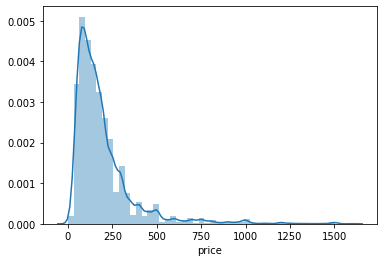

In [76]:
sns.distplot(traval_co.price)
plt.show()

Para remover os Outliers, vamos limitar as localizações onde os preços estão abaixo de $600,00

In [77]:
traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

Para deixar a plotagem mais informativa, vamos adicionar uma escala de cor que irá descriminar as localizações de acordo com o preço, e também deixaremos mais evidente as localidades com maior quantidade de reviews.

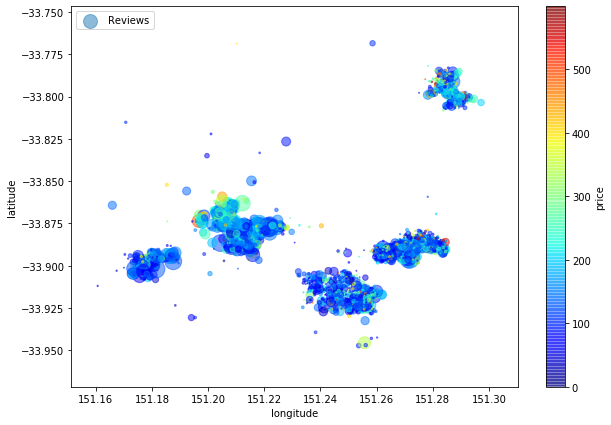

In [80]:
traval_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=traval_co["number_of_reviews"], label="Reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

***
Vamos Explorar a matriz de correlação um pouco.

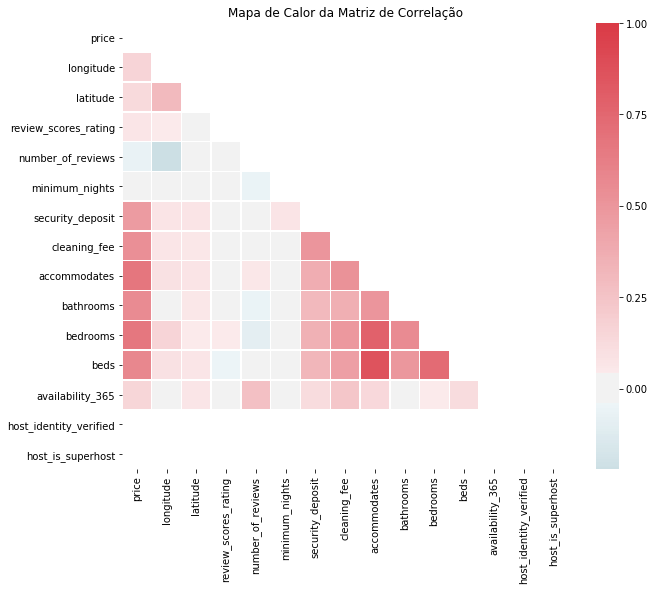

In [89]:
# Now let's explore our correlation matrix

corr_matrix = traval.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, mask=mask, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

Itens que tem alta correlação com os preços:
    - beds
    - bedrooms
    - bathrooms
    - accomodates
    - deaning fee
    - security deposit
    
<i>Uma coisa bem interessante é que longitude tem uma alta correlação negativa com o número de reviews, e talvez isso possa está relacionada com o tipo de local, por exemplo, podemos estar falando sobre um ambiente rural.

vamos listar os níveis de correlação em ordem decrescente.

In [90]:
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
accommodates              0.674368
bedrooms                  0.668963
beds                      0.582378
bathrooms                 0.553773
cleaning_fee              0.529834
security_deposit          0.469423
longitude                 0.157902
availability_365          0.148263
latitude                  0.131160
review_scores_rating      0.067066
minimum_nights            0.022103
number_of_reviews        -0.064011
host_identity_verified         NaN
host_is_superhost              NaN
Name: price, dtype: float64

Criando uma matriz com gráficos de diperção, focando em 5 atributos.

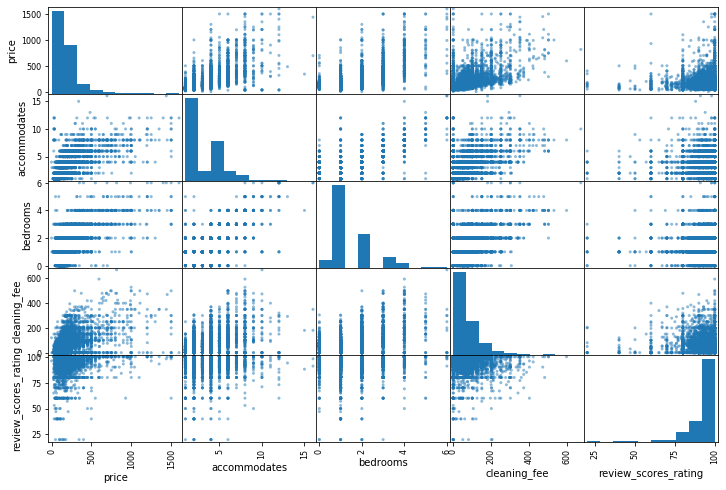

In [93]:
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval[attributes], figsize=(12, 8))
plt.show()

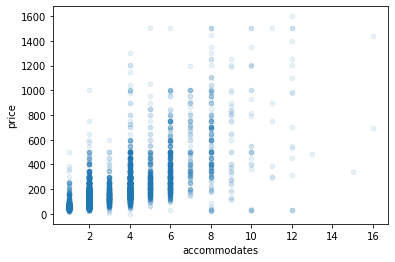

In [95]:
traval.plot(kind="scatter", x="accommodates", y="price", alpha=0.1)
plt.show()

A maioria das acomodações suportam entre uma à seis pessoas, onde se observa a tendência de aumento do preço quanto mais pessoas são hospedadas nas acomodações. 
***
Agora iremos fazer um trabalho de Feature Engineering e criando novas Features a partir da relação de outras Features já existentes em nosso dataset.

In [97]:
traval["bedrooms_per_person"] = traval["bedrooms"]/traval["accommodates"]
traval["bathrooms_per_person"] = traval["bathrooms"]/traval["accommodates"]
traval['host_since'] = pd.to_datetime(traval['host_since'])
traval['days_on_airbnb'] = (pd.to_datetime('today') - traval['host_since']).dt.days
traval.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,200.0,Newtown,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,...,House,Entire home/apt,127,0,0,2016-01-22,moderate,0.500000,0.250000,1458.0
1267,183.0,Randwick,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,...,Apartment,Private room,0,0,0,2014-03-28,moderate,0.500000,0.500000,2123.0
6658,175.0,Manly,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,...,Apartment,Entire home/apt,0,0,0,2014-01-09,strict_14_with_grace_period,0.500000,0.500000,2201.0
2522,85.0,Randwick,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,...,Apartment,Private room,90,0,0,2015-11-22,flexible,0.500000,0.500000,1519.0
722,80.0,Coogee,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,...,Apartment,Private room,0,0,0,2014-01-07,strict_14_with_grace_period,0.333333,0.333333,2203.0


## Preparando os dados para os Modelos de Machine Learning

In [98]:
 X  = traval.copy().drop("price", axis=1)

**Para fins didáticos, vamos mostrar alternativas de como podemos tratar valores ausentes**
***
Aqui estamos separando as primeiras cinco linhas para testar as metodologias.

In [109]:
sample_incomplete_rows = X[X.isnull().any(axis=1)].head()
print(sample_incomplete_rows.shape)
sample_incomplete_rows

(5, 22)


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,NaN,0,2,800.0,80.0,6,1.0,...,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2244.0
5439,Newtown,151.184469,-33.894582,NaN,0,3,5000.0,100.0,11,2.0,...,Apartment,Entire home/apt,0,0,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2013.0
3847,Bondi Beach,151.273077,-33.895142,NaN,0,7,271.0,27.0,2,1.0,...,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1504.0
1312,Randwick,151.245793,-33.920622,NaN,0,3,0.0,80.0,3,1.0,...,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1570.0
6194,Bondi Beach,151.273411,-33.888113,NaN,0,10,0.0,0.0,2,1.0,...,Apartment,Private room,0,0,0,2015-08-14,moderate,0.500000,0.500000,1619.0


 >Opção 1 -Remover as linhas

In [112]:
sample_incomplete_rows.dropna(subset=["review_scores_rating"])

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb


A depender do tamanho do dataset e da quantidade de linhas com valores faltando, podemos optar por essa opção.
***
 >Opção 2 -Remover coluna

In [106]:
# Columns Remove
sample_incomplete_rows.drop(["review_scores_rating"], axis=1)       # option 2

,city,longitude,latitude,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,0,2,800.0,80.0,6,1.0,3.0,...,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2244.0
5439,Newtown,151.184469,-33.894582,0,3,5000.0,100.0,11,2.0,3.0,...,Apartment,Entire home/apt,0,0,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2013.0
3847,Bondi Beach,151.273077,-33.895142,0,7,271.0,27.0,2,1.0,1.0,...,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1504.0
1312,Randwick,151.245793,-33.920622,0,3,0.0,80.0,3,1.0,2.0,...,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1570.0
6194,Bondi Beach,151.273411,-33.888113,0,10,0.0,0.0,2,1.0,1.0,...,Apartment,Private room,0,0,0,2015-08-14,moderate,0.500000,0.500000,1619.0


Apenas optaremos por fazer isso se a quantidade de valores ausentes for bastante alta e também se a seguinte característica não apresenta grande impacto nos valores de predição do modelo.
***
 >Opção 3 -Preencher com valores de mediana

In [107]:
median = X["review_scores_rating"].median()
sample_incomplete_rows["review_scores_rating"].fillna(median, inplace=True) # option 3

sample_incomplete_rows

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,Randwick,151.238806,-33.913834,96.0,0,2,800.0,80.0,6,1.0,...,House,Entire home/apt,0,0,0,2013-11-27,moderate,0.500000,0.166667,2244.0
5439,Newtown,151.184469,-33.894582,96.0,0,3,5000.0,100.0,11,2.0,...,Apartment,Entire home/apt,0,0,0,2014-07-16,strict_14_with_grace_period,0.272727,0.181818,2013.0
3847,Bondi Beach,151.273077,-33.895142,96.0,0,7,271.0,27.0,2,1.0,...,Apartment,Private room,0,0,0,2015-12-07,strict_14_with_grace_period,0.500000,0.500000,1504.0
1312,Randwick,151.245793,-33.920622,96.0,0,3,0.0,80.0,3,1.0,...,Apartment,Entire home/apt,0,0,0,2015-10-02,strict_14_with_grace_period,0.666667,0.333333,1570.0
6194,Bondi Beach,151.273411,-33.888113,96.0,0,10,0.0,0.0,2,1.0,...,Apartment,Private room,0,0,0,2015-08-14,moderate,0.500000,0.500000,1619.0


Em muitos dos casos essa opção sera a mais ideal, pois não iremos modificar muito as relações entre as Features e também não iremos diminuir o tamanho do nosso dataset.
***
Agora vamos utilizar um módulo da biblioteca sklearn para automatizar o processo de preenchimento dos valores ausentes, mas antes disso separaremos as variáveis categóricas das numéricas.

In [124]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

#Transformando em inteiros de 32bits
X['host_is_superhost'] = X['host_is_superhost'].eq('t').astype(int)
X['host_identity_verified'] = X['host_identity_verified'].eq('t').astype(int)


cat_cols = ["city","cancellation_policy","host_since","room_type","property_type","host_since"]
X_num = X.drop(cat_cols, axis=1)
X_num.head()

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5484,151.178552,-33.907150,96.0,61,2,250.0,85.0,4,1.0,2.0,2.0,127,0,0,0.500000,0.250000,1458.0
1267,151.249030,-33.906190,97.0,6,4,0.0,20.0,2,1.0,1.0,1.0,0,0,0,0.500000,0.500000,2123.0
6658,151.288491,-33.802074,100.0,2,2,0.0,40.0,2,1.0,1.0,1.0,0,0,0,0.500000,0.500000,2201.0
2522,151.236423,-33.913614,94.0,20,3,0.0,0.0,2,1.0,1.0,1.0,90,0,0,0.500000,0.500000,1519.0
722,151.259342,-33.918435,92.0,139,30,0.0,0.0,3,1.0,1.0,2.0,0,0,0,0.333333,0.333333,2203.0


Vamos dar um fit no imputer com nossos dados numéricos e depois verificar as estatísticas de cada colua.

In [125]:
imputer.fit(X_num)
imputer.statistics_

array([ 1.51259665e+02, -3.38885369e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        1.88400000e+03])

Aqui preenchemos os valores ausentes e depois criamos outro DataFrame para armazenar os dados transformados.

In [126]:
X_num_np = imputer.transform(X_num)
X_num = pd.DataFrame(X_num_np, columns=X_num.columns,index = list(X_num.index.values))
X_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
5594,151.238806,-33.913834,96.0,0.0,2.0,800.0,80.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.500000,0.166667,2244.0
5439,151.184469,-33.894582,96.0,0.0,3.0,5000.0,100.0,11.0,2.0,3.0,4.0,0.0,0.0,0.0,0.272727,0.181818,2013.0
3847,151.273077,-33.895142,96.0,0.0,7.0,271.0,27.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.500000,0.500000,1504.0
1312,151.245793,-33.920622,96.0,0.0,3.0,0.0,80.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.666667,0.333333,1570.0
6194,151.273411,-33.888113,96.0,0.0,10.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.500000,0.500000,1619.0


In [127]:
print("Estratégia utilizada para preenchimento dos valores ausentes: {}".format(imputer.strategy))

Estratégia utilizada para preenchimento dos valores ausentes: median


***
Agora é a hora de processar nossos dados categóricos

In [128]:
X_cat = X.select_dtypes(include=[object])
X_cat.head(10)

,city,property_type,room_type,cancellation_policy
5484,Newtown,House,Entire home/apt,moderate
1267,Randwick,Apartment,Private room,moderate
6658,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
2522,Randwick,Apartment,Private room,flexible
722,Coogee,Apartment,Private room,strict_14_with_grace_period
3150,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
2865,Surry Hills,Apartment,Entire home/apt,strict_14_with_grace_period
4906,Bondi Beach,Apartment,Entire home/apt,strict_14_with_grace_period
575,Coogee,Apartment,Entire home/apt,strict_14_with_grace_period
5827,Newtown,House,Private room,flexible


Usando Ordinal Encoder

In [130]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_cat_enc = ordinal_encoder.fit_transform(X_cat)
X_cat_enc[:10]

array([[5., 6., 0., 1.],
       [7., 0., 1., 1.],
       [4., 0., 0., 2.],
       [7., 0., 1., 0.],
       [2., 0., 1., 2.],
       [4., 0., 0., 2.],
       [8., 0., 0., 2.],
       [1., 0., 0., 2.],
       [2., 0., 0., 2.],
       [5., 6., 1., 0.]])

Essas foram as categorias criadas:

In [131]:
ordinal_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Coogee', 'Darlinghurst', 'Manly',
        'Newtown', 'North Bondi', 'Randwick', 'Surry Hills', 'Sydney'],
       dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite',
        'Guesthouse', 'Hostel', 'House', 'Loft', 'Other',
        'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

> Vamos testar outra técnica para codificar os dados categóricos - One Hot Encoder

In [133]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [134]:
cat_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Coogee', 'Darlinghurst', 'Manly',
        'Newtown', 'North Bondi', 'Randwick', 'Surry Hills', 'Sydney'],
       dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite',
        'Guesthouse', 'Hostel', 'House', 'Loft', 'Other',
        'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

### Vamos criar um pipeline para preprocessar os dados

> 1 - Criando classe responsável por algumas etapas do preprocessamento

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Receive numpy array, convert to pandas for features, convert back to array for output.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity = True, num_cols=[]): # no *args or **kargs
        self.popularity = popularity
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        
        ### Some feature engineering
        X = pd.DataFrame(X, columns=num_cols)
        X["bedrooms_per_person"] = X["bedrooms"]/X["accommodates"]
        X["bathrooms_per_person"] = X["bathrooms"]/X["accommodates"]
        
        global feats
        feats = ["bedrooms_per_person","bathrooms_per_person"]

        if self.popularity:
            X["past_and_future_popularity"]=X["number_of_reviews"]/(X["availability_365"]+1)
            feats.append("past_and_future_popularity")
            
            return X.values
        else:
            return X.values
        

> 2 - Configurando o Pipeline para os dados numéricos

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

strat_train_set2 = strat_train_set.dropna()
X = strat_train_set2.copy().drop("price",axis=1)
Y = strat_train_set2["price"]

num_cols = list(X.select_dtypes(include=numerics).columns)
cat_cols = list(X.select_dtypes(include=[object]).columns)

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(num_cols=num_cols,popularity=True)),
        ('std_scaler', StandardScaler()),
    ])

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


> 3 - Configurando o segundo Pipeline

In [137]:
from sklearn.compose import ColumnTransformer
import itertools


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

mid_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(),cat_cols ),
    ])

Vamos dar um fit no nosso Pipeline e depois iremos usar apenas a etapa responsável por tratar os dados categóricos

In [138]:
mid_pipeline.fit(X) # this one specifically has to be fitted for the cat names
cat_encoder = mid_pipeline.named_transformers_["cat"]
sublists = [list(bas) for bas in cat_encoder.categories_]
one_cols = list(itertools.chain(*sublists))

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Essa classe vai transformar os valores em Numpy para Pandas

In [139]:
class ToPandasDF(BaseEstimator, TransformerMixin):
    def __init__(self, fit_index = [] ): # no *args or **kargs
        self.fit_index = fit_index
    def fit(self, X_df, y=None):
        return self  # nothing else to do
    def transform(self, X_df, y=None):
        global cols
        cols = num_cols.copy()
        cols.extend(feats)
        cols.extend(one_cols) # one in place of cat
        X_df = pd.DataFrame(X_df, columns=cols,index=self.fit_index)

        return X_df

Aqui criamos uma função para acoplar o segundo Pipeline com a classe resposável por transformar os dados para DataFrame, criando um terceiro Pipeline.

In [141]:
def pipe(inds):
    return Pipeline([
            ("mid", mid_pipeline),
            ("PD", ToPandasDF(inds)),
        ])

Agora vamos usar nosso Pipeline

In [143]:
params = {"inds" : list(X.index)}

X_pr = pipe(**params).fit_transform(X) 

X_pr.head()

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,...,Serviced apartment,Townhouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_60
5484,-1.998871,-0.783981,0.304899,1.084616,-0.142452,-0.089243,0.214312,0.414626,-0.446702,0.633003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1267,0.094447,-0.756122,0.413560,-0.402834,-0.022353,-0.594668,-0.694888,-0.669371,-0.446702,-0.499778,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6658,1.266501,2.266244,0.739541,-0.511012,-0.142452,-0.594668,-0.415134,-0.669371,-0.446702,-0.499778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2522,-0.280005,-0.971618,0.087578,-0.024210,-0.082403,-0.594668,-0.974641,-0.669371,-0.446702,-0.499778,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
722,0.400714,-1.111584,-0.129743,3.194089,1.538926,-0.594668,-0.974641,-0.127373,-0.446702,-0.499778,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Selecionando e Treinando dos Modelos

> Treinando 

In [144]:
from sklearn.linear_model import LinearRegression
Y_pr = Y.copy() # just for naming convention, _pr for processed.

lin_reg = LinearRegression()
lin_reg.fit(X_pr, Y_pr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> Prevendo alguns valores

In [145]:
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]
some_data_prepared = pipe(inds=list(some_data.index)).transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [213.59492156  47.76080438 151.16297931  44.71920151  71.67545185]


<i> Vamos comparar com os resultados verdadeiros

In [146]:
print("Labels:", list(some_labels))

Labels: [200.0, 183.0, 175.0, 85.0, 80.0]


- Naturalmente, essas métricas não são tão justas, porque são simples.
- No entanto, pelo fato do primeiro modelo é linear, é menos provável o modelo ficar overfitted.
- Mais tarde, lidaremos com a validação utilizando amostras de teste.
***
Calculando a performance:

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_pred = lin_reg.predict(X_pr)
lin_mse = mean_squared_error(Y, X_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

94.04131367984128

In [148]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y, X_pred)
lin_mae

60.10040604159422

**Decision tree**

In [149]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_pr, Y)

X_pred = tree_reg.predict(X_pr)
tree_mse = mean_squared_error(Y, X_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

0.0

O modelo se tornou complexo e acabou ocorrendo o overfit
***
Agora é hora de sintonizar nosso modelo.

In [150]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_pr, Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [151]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [139.86257343 137.57823128 107.82596734  99.60590789 136.07611848
 143.87862139 136.10783966 124.14661686 118.67656074 108.48785824]
Mean: 125.22462953067368
Standard deviation: 14.94738284533251


**Random Florest Regression**

In [152]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_pr, Y)

X_pred = forest_reg.predict(X_pr)
forest_mse = mean_squared_error(Y, X_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


39.65620086202112

In [153]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_pr, Y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [100.56986232  97.87713067  88.45537718  82.74731709  98.25427718
  95.91454162  87.16623842  86.42895408  81.87165939  88.78452043]
Mean: 90.80698783852344
Standard deviation: 6.431881001048496


In [154]:
scores = cross_val_score(lin_reg,  X_pr, Y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean      95.275002
std        8.405222
min       84.384181
25%       87.706739
50%       95.959333
75%      100.531356
max      110.492833
dtype: float64

**Suport Vector Regressor**

In [155]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit( X_pr, Y,)
X_pred = svm_reg.predict(X_pr)
svm_mse = mean_squared_error(Y, X_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

103.08131899848134

### Vamos usar a função GridSearchCV para buscar os melhores parâmetros para nosso modelo. (RandomFlorest)

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X_pr, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

***
> Melhor hiperparâmetros e modelo

In [159]:
print(grid_search.best_params_)
print("\n\n")
print(grid_search.best_estimator_)

{'max_features': 6, 'n_estimators': 30}



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


***
Vamos dar uma olhada na pontuação de cada combinação de hiperparâmetros testada durante a pesquisa na grade:

In [160]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

108.93208086856126 {'max_features': 2, 'n_estimators': 3}
96.12395819721317 {'max_features': 2, 'n_estimators': 10}
89.89984993515455 {'max_features': 2, 'n_estimators': 30}
103.44916311399588 {'max_features': 4, 'n_estimators': 3}
92.84971010162162 {'max_features': 4, 'n_estimators': 10}
88.49523286377755 {'max_features': 4, 'n_estimators': 30}
99.2579822552576 {'max_features': 6, 'n_estimators': 3}
90.63899084946257 {'max_features': 6, 'n_estimators': 10}
86.96965512982227 {'max_features': 6, 'n_estimators': 30}
105.21862925870472 {'max_features': 8, 'n_estimators': 3}
91.08181466487558 {'max_features': 8, 'n_estimators': 10}
87.46393666401863 {'max_features': 8, 'n_estimators': 30}
105.88554965842813 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
95.17660140869557 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
102.70980454062152 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
91.23507076013144 {'bootstrap': False, 'max_features': 3, 'n_estimators'

#### Top 5 resultados 

In [161]:
pd.DataFrame(grid_search.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032199,0.002314,0.004802,0.000747,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-12955.951619,-12496.273805,...,-11866.198242,970.863065,18,-2839.471955,-3196.243241,-2998.057660,-3405.745375,-2739.529514,-3035.809549,240.975932
1,0.070325,0.007486,0.006406,0.004105,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-10741.179242,-9961.423383,...,-9239.815339,1202.796914,11,-1524.100350,-1609.014963,-1622.676561,-1791.866385,-1645.413691,-1638.614390,86.920665
2,0.233318,0.055527,0.013440,0.001665,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9577.207193,-7968.894606,...,-8081.983018,1050.511519,4,-1222.581973,-1323.830022,-1317.687284,-1335.575113,-1262.182988,-1292.371476,43.079007
3,0.030779,0.004113,0.002808,0.002323,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-11351.522353,-10037.195186,...,-10701.729349,737.332308,15,-2833.621635,-3022.659878,-2714.068214,-2781.240276,-2980.295298,-2866.377060,117.406012
4,0.097383,0.011270,0.006402,0.001359,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-9652.668346,-8527.164984,...,-8621.068666,612.415623,9,-1433.697737,-1576.146321,-1505.256566,-1708.763020,-1683.084328,-1581.389594,104.117648


### Vamos usar a função RandomizedSearchCV para buscar os melhores parâmetros para nosso modelo.

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit( X_pr, Y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [163]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

87.30239023747926 {'max_features': 7, 'n_estimators': 180}
90.85502468751419 {'max_features': 5, 'n_estimators': 15}
89.1967786173295 {'max_features': 3, 'n_estimators': 72}
89.4235855759541 {'max_features': 5, 'n_estimators': 21}
87.45708883783517 {'max_features': 7, 'n_estimators': 122}
Best grid-search performance:  87.30239023747926


In [164]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.65293746e-02, 3.18548140e-02, 2.74864514e-02, 2.26043777e-02,
       2.09202538e-02, 4.72852229e-02, 6.33613592e-02, 1.04145365e-01,
       1.07054999e-01, 1.33051646e-01, 1.02655344e-01, 2.70803818e-02,
       0.00000000e+00, 0.00000000e+00, 2.31711160e-02, 3.88036055e-02,
       3.80629859e-02, 3.03789252e-03, 4.40949013e-03, 2.26751516e-03,
       2.50129838e-03, 3.96207706e-03, 1.44565809e-03, 4.92331505e-03,
       2.25233417e-03, 2.24662174e-03, 3.22770057e-03, 1.30367360e-02,
       7.01159148e-04, 2.81284647e-03, 1.05305022e-04, 1.25206576e-03,
       3.91112401e-04, 2.26791574e-02, 2.44831744e-04, 3.95128365e-04,
       9.75685967e-05, 1.65943938e-03, 2.70659495e-03, 4.43589769e-02,
       2.62279869e-02, 2.27397209e-03, 4.86709007e-03, 4.69808442e-03,
       6.66483670e-03, 4.85907432e-04])

In [165]:
feats = pd.DataFrame()
feats["Name"] = list(X_pr.columns)
feats["Score"] = feature_importances
feats.sort_values("Score",ascending=False).round(5).head(20)

,Name,Score
9,bedrooms,0.13305
8,bathrooms,0.10705
7,accommodates,0.10415
10,beds,0.10266
6,cleaning_fee,0.06336
5,security_deposit,0.04729
0,longitude,0.04653
39,Entire home/apt,0.04436
15,bathrooms_per_person,0.03880
16,past_and_future_popularity,0.03806


## Agora é hora de testar nossos dados de teste

In [166]:
final_model = grid_search.best_estimator_

strat_test_set2 = strat_test_set.dropna()
X_test = strat_test_set2.drop("price", axis=1)
y_test = strat_test_set2["price"].copy()

X_test_prepared = pipe(list(X_test.index)).transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [167]:
final_rmse

83.21604165813544

In [168]:
final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

50.91005110732539

## Estimando valores para um cliente

In [169]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
city                      1 non-null object
longitude                 1 non-null object
latitude                  1 non-null object
review_scores_rating      1 non-null object
number_of_reviews         1 non-null object
minimum_nights            1 non-null object
accommodates              1 non-null object
bathrooms                 1 non-null object
bedrooms                  1 non-null object
beds                      1 non-null object
security_deposit          1 non-null object
cleaning_fee              1 non-null object
property_type             1 non-null object
room_type                 1 non-null object
availability_365          1 non-null object
host_identity_verified    1 non-null object
host_is_superhost         1 non-null object
cancellation_policy       1 non-null object
host_since                1 non-null object
dtypes: object(19)
memory usage: 232.0+ bytes


In [170]:
df_client.iloc[0]

city                                      Bondi Beach
longitude                                     151.275
latitude                                     -33.8891
review_scores_rating                               95
number_of_reviews                                  53
minimum_nights                                      4
accommodates                                       10
bathrooms                                           3
bedrooms                                            5
beds                                                7
security_deposit                                 1500
cleaning_fee                                      370
property_type                                   House
room_type                             Entire home/apt
availability_365                                  255
host_identity_verified                              t
host_is_superhost                                   t
cancellation_policy       strict_14_with_grace_period
host_since                  

In [172]:
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = '1'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = '1'
dict_client["host_since"] = parser.parse("01-08-2010")
dict_client["cancellation_policy"] = "strict_14_with_grace_period"

df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

print(df_client.columns)
df_client

Index(['city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type', 'room_type', 'availability_365',
       'host_identity_verified', 'host_is_superhost', 'host_since',
       'cancellation_policy'],
      dtype='object')


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,Bondi Beach,151.275,-33.8891,95,53,4,1500,370,10,3,5,7,House,Entire home/apt,255,1,1,2010-01-08 00:00:00,strict_14_with_grace_period


In [173]:
df_client = pipe(list(df_client.index)).transform(df_client)

In [174]:
df_client

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,...,Serviced apartment,Townhouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_60
0,0.851126,-0.25964,0.196238,0.868259,-0.022353,2.43788,4.200801,3.666618,3.585665,4.031346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [175]:
client_pred = final_model.predict(df_client)
### Client should be charging about ~$280 more. 
print('\x1b[1;31m'+str(client_pred[0])+'\x1b[0m')
print('\x1b[1;31m'+str(-500)+'\x1b[0m')
print('\x1b[1;31m'+"= "+str(client_pred[0]-500)+'\x1b[0m')

773.4333333333333
-500
= 273.4333333333333
